# Average Marginal Effects

In [3]:
import pandas as pd
import numpy as np

In [4]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

shap.initjs()

In [5]:
df=pd.read_csv('project/df_new.csv')
X=df.drop(['Loan Status','Term', 'Years in current job','Home Ownership','Purpose'], axis=1)
y=df['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [6]:
X_train.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
33980,15258.0,744.0,45774.0,1110.02,17.8,17,1,20973,52041.0,1.0,0.0
33102,11947.0,7000.0,51771.0,1333.11,10.7,11,0,22019,32766.0,0.0,0.0
99987,10250.0,737.0,46125.0,186.43,16.9,10,0,5669,7996.0,0.0,0.0
59072,35063.0,716.0,170306.0,3505.47,33.5,12,0,79757,108810.0,0.0,0.0
102057,6913.0,751.0,103698.0,950.57,15.4,10,0,0,0.0,0.0,0.0


In [7]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [8]:
def model_proba(x):
    return model.predict_proba(x)[:,1]
def model_log_odds(x):
    p = model.predict_log_proba(x)
    return p[:,1] - p[:,0]

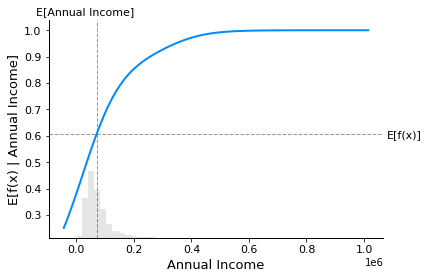

In [9]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "Annual Income", model_proba, X_train, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [10]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(X_train, max_samples=100)
explainer = shap.Explainer(model_proba, background)
shap_values_adult = explainer(X_train[:1000])

Permutation explainer: 1001it [00:35, 21.11it/s]                         


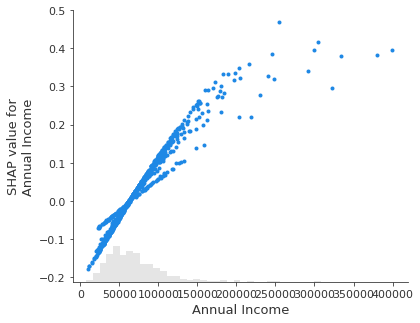

In [11]:
shap.plots.scatter(shap_values_adult[:,"Annual Income"])

In [12]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(model_log_odds, background)
shap_values_log_odds = explainer_log_odds(X_train[:1000])

Permutation explainer: 1001it [00:34, 20.14it/s]                         


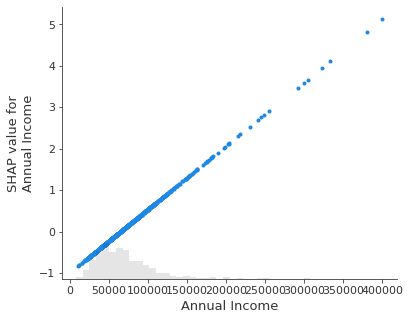

In [13]:
shap.plots.scatter(shap_values_log_odds[:,"Annual Income"])

In [15]:
# compute SHAP values
explainer = shap.Explainer(model, background)
shap_values = explainer(X_train)

In [16]:
# set a display version of the data to use for plotting (has string values)
shap_values.display_data = X.values

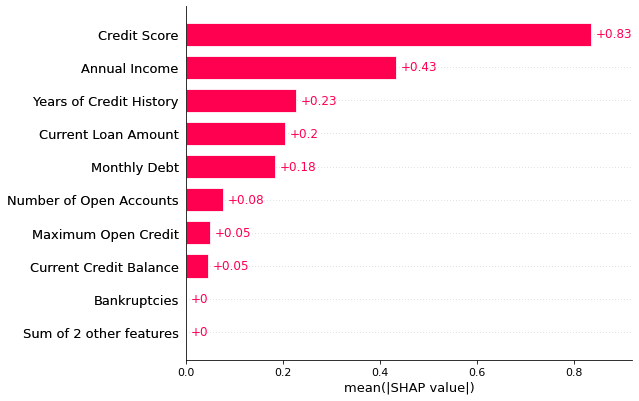

In [17]:
shap.plots.bar(shap_values) # use mean absolute value of each feature over all the instances

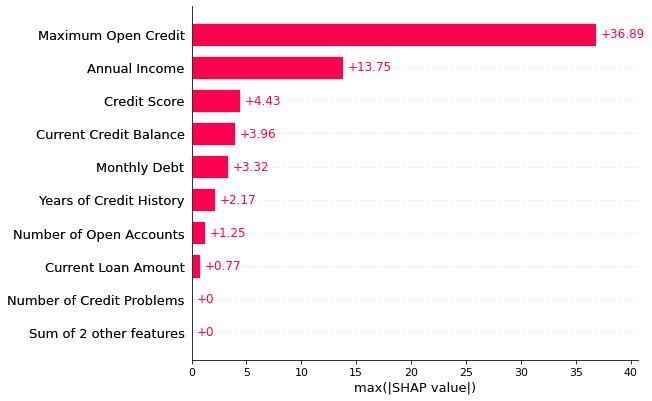

In [18]:
shap.plots.bar(shap_values.abs.max(0)) # use max absolute value 

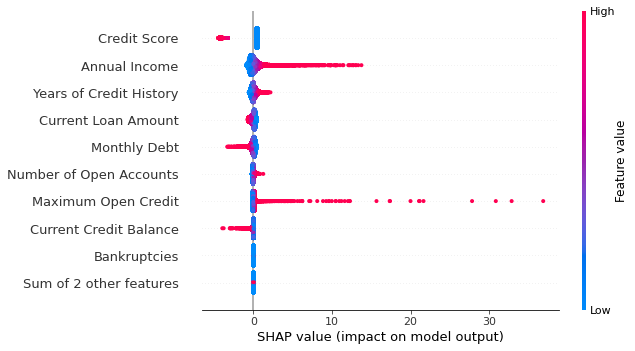

In [19]:
shap.plots.beeswarm(shap_values)

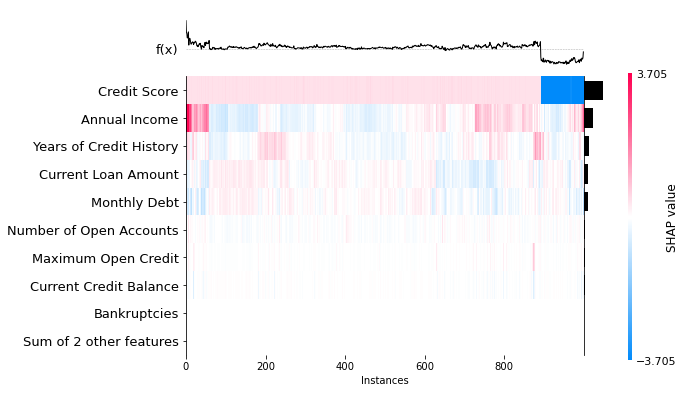

In [21]:
shap.plots.heatmap(shap_values[:1000])

In [ ]:
# mean values of Credit Score, Annual Income, Years of Credit History, Current Loan Amount, Monthly Debt -- are important
# max values of Maximum Credit and Annual Income -- are important

# Tax Liens, Bnkruptcies, Nimber of Credit Problems, Number of Open Accounts, Current Credit Balance -- are not important